# Predicting Liver Disease:
The given dataset is related to Indian patients who have been tested for a liver disease. Based on chemical compounds (bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT, SGPT the outcome mentioned is whether person is a patient i.e, whether he needs to be diagnosed further or not. 

## Objective:
Perform data cleansing, and required transformations and build a predictive model which will be able to predict most of the cases accurately.

## Attributes:
Following are the feature names for the given data:
Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,
Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,
Albumin_and_Globulin_Ratio,Class.


#### Step 1:
Importing the libraries required - 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Step 2:
Loading the Data - 

In [3]:
data = pd.read_csv("C:/Users/Rohit/Downloads/IndianLiverPatientData.txt", delimiter="\t", header=None, index_col=0)
data.head()

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


As you can see we have no headings for the columns we give them manually

In [5]:
data.columns = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase",
                         "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Protiens", "Albumin"
                         , "Albumin_and_Globulin_Ratio", "Class"]
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


We can check the summary by - 

In [8]:
summary = data.describe(include='all') # include all so that it takes categorical columns if there exist any
print(summary)

               Age Gender  Total_Bilirubin  Direct_Bilirubin  \
count   583.000000    563       583.000000        583.000000   
unique         NaN      2              NaN               NaN   
top            NaN   Male              NaN               NaN   
freq           NaN    421              NaN               NaN   
mean     44.746141    NaN         3.298799          1.486106   
std      16.189833    NaN         6.209522          2.808498   
min       4.000000    NaN         0.400000          0.100000   
25%      33.000000    NaN         0.800000          0.200000   
50%      45.000000    NaN         1.000000          0.300000   
75%      58.000000    NaN         2.600000          1.300000   
max      90.000000    NaN        75.000000         19.700000   

        Alkaline_Phosphotase  Alamine_Aminotransferase  \
count             583.000000                583.000000   
unique                   NaN                       NaN   
top                      NaN                       NaN   

#### Step 3:
Checking for null values - 

In [9]:
data.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [10]:
# creating a copy of data if we mess something up
data1 = data.copy()

In [12]:
data1['Gender'].value_counts()

Male      421
Female    142
Name: Gender, dtype: int64

In [13]:
# as we have more values for "Male" we fill the missing values in Gender column with "Male"
data1['Gender'].fillna(data1['Gender'].mode()[0], inplace=True)

In [14]:
# and we do the following for Albumin_and_Globulin_Ratio, Total_Protiens
for value in ['Albumin_and_Globulin_Ratio', 'Total_Protiens']:
    data1[value].fillna(data1[value].median(), inplace=True)

In [15]:
# to check if NAs still exist
data1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

#### Step 4:
Performing Label Encoding on categorical columns - 

In [16]:
col_name = ['Gender', 'Class']
from sklearn import preprocessing
le={}
for value in col_name:
    le[value]=preprocessing.LabelEncoder()
for value in col_name:
    data1[value] = le[value].fit_transform(data1[value])

data1.info() # see if all values are either float or int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 583
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null int32
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Class                         583 non-null int32
dtypes: float64(5), int32(2), int64(4)
memory usage: 50.1 KB


#### Step 5:
To check for Outliers -

In [19]:
summary2 = data1.describe(np.arange(0.9, 0.99, 0.01), include='all')
print(summary2)

              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.756432         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
50%     45.000000    1.000000         1.000000          0.300000   
90%     66.000000    1.000000         7.860000          4.080000   
91%     66.000000    1.000000         8.900000          4.500000   
92%     67.440000    1.000000        10.900000          5.144000   
93%     69.260000    1.000000        12.256000          6.252000   
94%     70.000000    1.000000        14.816000          7.608000   
95%     72.000000    1.000000        16.350000          8.400000   
96%     72.720000    1.000000        18.288000          8.972000   
97%     74.540000    1.000000        20.108000         10.108000   
98%     75.000000    1.000000        23.072000  

In [20]:
data2 = data1.loc[data1["Alkaline_Phosphotase"] < 909] 
# here we took those samples where the specified column had value below 97th %ile

data3 = data2.loc[data2["Alamine_Aminotransferase"] < 500]
# here we took those samples where the specified column had value below 98th %ile

# we took this values because they seemed to have no outliers beyond those values

#### Step 6:
Checking multicollinearity and removing it - 

In [23]:
# independent variables
x = data3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
           'Albumin_and_Globulin_Ratio']]

# dependent variables
y = data3[['Class']]


corr2 = x.corr(method='pearson')
corr2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.063305,0.020704,0.012033,0.009075,-0.053116,-0.007257,-0.185952,-0.265396,-0.207842
Gender,0.063305,1.000000,0.107551,0.121324,0.054975,0.117867,0.124726,-0.096330,-0.114106,-0.024835
Total_Bilirubin,0.020704,0.107551,1.000000,0.860373,0.184910,0.223902,0.294169,0.006380,-0.224084,-0.200034
Direct_Bilirubin,0.012033,0.121324,0.860373,1.000000,0.209227,0.264239,0.328998,0.012968,-0.234582,-0.194982
Alkaline_Phosphotase,0.009075,0.054975,0.184910,0.209227,1.000000,0.245415,0.156771,0.024365,-0.136099,-0.224555
Alamine_Aminotransferase,-0.053116,0.117867,0.223902,0.264239,0.245415,1.000000,0.774318,0.067497,-0.001841,-0.075860
Aspartate_Aminotransferase,-0.007257,0.124726,0.294169,0.328998,0.156771,0.774318,1.000000,0.044045,-0.112410,-0.130274
Total_Protiens,-0.185952,-0.096330,0.006380,0.012968,0.024365,0.067497,0.044045,1.000000,0.762831,0.215418
Albumin,-0.265396,-0.114106,-0.224084,-0.234582,-0.136099,-0.001841,-0.112410,0.762831,1.000000,0.680478
Albumin_and_Globulin_Ratio,-0.207842,-0.024835,-0.200034,-0.194982,-0.224555,-0.075860,-0.130274,0.215418,0.680478,1.000000


In [25]:
# We remove albumin as it is correlated to both 'total protein' and 'albumin and globulin ratio'

# and we check the multicollinearity again
x = data3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Aspartate_Aminotransferase', 'Total_Protiens',
           'Albumin_and_Globulin_Ratio']]
coor3 = x.corr(method = "pearson")
coor3

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
Age,1.000000,0.063305,0.020704,0.012033,0.009075,-0.053116,-0.007257,-0.185952,-0.207842
Gender,0.063305,1.000000,0.107551,0.121324,0.054975,0.117867,0.124726,-0.096330,-0.024835
Total_Bilirubin,0.020704,0.107551,1.000000,0.860373,0.184910,0.223902,0.294169,0.006380,-0.200034
Direct_Bilirubin,0.012033,0.121324,0.860373,1.000000,0.209227,0.264239,0.328998,0.012968,-0.194982
Alkaline_Phosphotase,0.009075,0.054975,0.184910,0.209227,1.000000,0.245415,0.156771,0.024365,-0.224555
Alamine_Aminotransferase,-0.053116,0.117867,0.223902,0.264239,0.245415,1.000000,0.774318,0.067497,-0.075860
Aspartate_Aminotransferase,-0.007257,0.124726,0.294169,0.328998,0.156771,0.774318,1.000000,0.044045,-0.130274
Total_Protiens,-0.185952,-0.096330,0.006380,0.012968,0.024365,0.067497,0.044045,1.000000,0.215418
Albumin_and_Globulin_Ratio,-0.207842,-0.024835,-0.200034,-0.194982,-0.224555,-0.075860,-0.130274,0.215418,1.000000


In [26]:
# 'Alamine_Aminotransferase' is more specific to liver than 'Aspartate_Aminotransferase' so we keep
#'Alamine_Aminotransferase' and drop 'Aspartate_Aminotransferase'

x = data3[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
coor4 = x.corr(method="pearson")
coor4

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
Age,1.000000,0.063305,0.020704,0.012033,0.009075,-0.053116,-0.185952,-0.207842
Gender,0.063305,1.000000,0.107551,0.121324,0.054975,0.117867,-0.096330,-0.024835
Total_Bilirubin,0.020704,0.107551,1.000000,0.860373,0.184910,0.223902,0.006380,-0.200034
Direct_Bilirubin,0.012033,0.121324,0.860373,1.000000,0.209227,0.264239,0.012968,-0.194982
Alkaline_Phosphotase,0.009075,0.054975,0.184910,0.209227,1.000000,0.245415,0.024365,-0.224555
Alamine_Aminotransferase,-0.053116,0.117867,0.223902,0.264239,0.245415,1.000000,0.067497,-0.075860
Total_Protiens,-0.185952,-0.096330,0.006380,0.012968,0.024365,0.067497,1.000000,0.215418
Albumin_and_Globulin_Ratio,-0.207842,-0.024835,-0.200034,-0.194982,-0.224555,-0.075860,0.215418,1.000000


In [27]:
# As 'Total bilirubin' considers both water and fat soluble substances we drop 'direct bilirubin'

x = data3[['Age', 'Gender', 'Total_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
coor5 = x.corr(method="pearson")

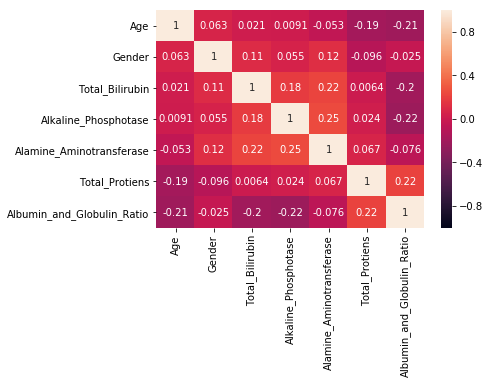

In [28]:
# we check the same with the help of heat map whether removing the above columns helped in reducing multicollinearity
sns.heatmap(coor5, vmin=-1, vmax=1, annot=True)

#### Step 7:
Resampling (*Class Balancing*)

In [29]:
data3['Class'].value_counts()

0    388
1    166
Name: Class, dtype: int64

We observe here that our dependent variable has class imbalanced as class 0 has 388 observations and class 1 has 166 observations.
Hence to resolve this issue we upsample the class 1 to class 0 so that it matches perfectly and doesn't affect our predictions.

In [31]:
data4 = pd.concat([x, y], axis=1)
df_major = data4[data4['Class'] == 0]
df_minor = data4[data4['Class'] == 1]

upSample = resample(df_minor, replace=True, n_samples=388, random_state=0)

data5 = pd.concat([df_major, upSample])
data5['Class'].value_counts()

1    388
0    388
Name: Class, dtype: int64

As you can see we have matched both the classes

#### Step 8:
Scaling the data

In [32]:
x = data5[['Age', 'Gender', 'Total_Bilirubin',
           'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
           'Total_Protiens', 'Albumin_and_Globulin_Ratio']]
y = data5['Class']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x = scale.transform(x)

#### Step 9:
Splitting the data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Step 10:
Performing Logistic Regression

In [35]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

y_pred = model_lr.predict(x_test)

In [36]:
# confusion matrix and some othe measures
cfm = confusion_matrix(y_test, y_pred)

print(cfm)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[41 30]
 [19 66]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        71
           1       0.69      0.78      0.73        85

    accuracy                           0.69       156
   macro avg       0.69      0.68      0.68       156
weighted avg       0.69      0.69      0.68       156

0.6858974358974359


The catch here is that while dividing the classes as the probability of being 1, the GLM by default assumes the threshold as 0.5
Hence we need to decide which threshold suits better by checking for errors manually.

In [37]:
# this gives us a data frame for probabilty of each observation being 0 or 1
y_pred_prob = model_lr.predict_proba(x_test)
print(y_pred_prob) # first column is prob. of being 0 and 2nd column is prob. of beinf 1

[[3.79015689e-01 6.20984311e-01]
 [3.15061664e-01 6.84938336e-01]
 [5.03658284e-01 4.96341716e-01]
 [8.76892943e-01 1.23107057e-01]
 [3.85386419e-01 6.14613581e-01]
 [3.42904387e-01 6.57095613e-01]
 [3.10812823e-01 6.89187177e-01]
 [3.84841870e-01 6.15158130e-01]
 [2.73809565e-01 7.26190435e-01]
 [3.88145628e-01 6.11854372e-01]
 [3.59816573e-01 6.40183427e-01]
 [3.36302097e-01 6.63697903e-01]
 [7.16060973e-01 2.83939027e-01]
 [3.10763336e-01 6.89236664e-01]
 [3.07018224e-01 6.92981776e-01]
 [3.88145628e-01 6.11854372e-01]
 [3.94509746e-01 6.05490254e-01]
 [5.69212388e-01 4.30787612e-01]
 [5.98679316e-01 4.01320684e-01]
 [5.93751541e-01 4.06248459e-01]
 [4.03036778e-01 5.96963222e-01]
 [2.20803501e-01 7.79196499e-01]
 [2.56669791e-01 7.43330209e-01]
 [2.73809565e-01 7.26190435e-01]
 [9.92174127e-01 7.82587320e-03]
 [3.90471903e-01 6.09528097e-01]
 [6.05807637e-01 3.94192363e-01]
 [2.43451824e-01 7.56548176e-01]
 [4.95418788e-01 5.04581212e-01]
 [5.69212388e-01 4.30787612e-01]
 [7.076442

In [38]:
# Now we check threshold wise which gives us less Type 2 error and significantly acceptable Total Error and Type 1 error
for a in np.arange(0.2, 0.8, 0.01):
    predict_mine = np.where(y_pred_prob[:, 1] > a, 1, 0)
    cfm = confusion_matrix(y_test, predict_mine)
    total_err = cfm[0, 1]+cfm[1, 0]
    print("Errors at threshold ", a, ":", total_err, " , type 2 error :",
          cfm[1, 0], " , type 1 error:", cfm[0, 1])

Errors at threshold  0.2 : 46  , type 2 error : 1  , type 1 error: 45
Errors at threshold  0.21000000000000002 : 46  , type 2 error : 1  , type 1 error: 45
Errors at threshold  0.22000000000000003 : 45  , type 2 error : 1  , type 1 error: 44
Errors at threshold  0.23000000000000004 : 45  , type 2 error : 1  , type 1 error: 44
Errors at threshold  0.24000000000000005 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.25000000000000006 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.26000000000000006 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2700000000000001 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2800000000000001 : 43  , type 2 error : 1  , type 1 error: 42
Errors at threshold  0.2900000000000001 : 43  , type 2 error : 2  , type 1 error: 41
Errors at threshold  0.3000000000000001 : 44  , type 2 error : 3  , type 1 error: 41
Errors at threshold  0.3100000000000001 : 44  , type 2 error : 3  , type 1

In [53]:
# Now we decide the threshold to be 0.35 as it has lower Type 2 error and considerably acceptable Total error
# While detecting a disease we Type 2 error says that he/she doesn't have a disease in fact when he/she has the disease
# Hence we look for a small Type 2 error

y_pred1 = np.where(y_pred_prob[:, 1] > 0.35, 1, 0)

cfm = confusion_matrix(y_test, y_pred1)
print(cfm)
print(classification_report(y_test, y_pred1))
print("Accuracy is",round(accuracy_score(y_test, y_pred1)*100, 2) , "%")

[[30 41]
 [ 6 79]]
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        71
           1       0.66      0.93      0.77        85

    accuracy                           0.70       156
   macro avg       0.75      0.68      0.67       156
weighted avg       0.74      0.70      0.68       156

Accuracy is 69.87 %


A slight increase in the accuracy but not worth considering

#### Step 11:
Performing SVC

In [52]:
model = SVC(C=1, kernel='rbf')  # i.e cost = 1

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(cfm)
print(classification_report(y_test, y_pred))
print("Accuracy is", round(accuracy_score(y_test, y_pred)*100, 2) , "%")

[[30 41]
 [ 6 79]]
              precision    recall  f1-score   support

           0       0.78      0.51      0.62        71
           1       0.68      0.88      0.77        85

    accuracy                           0.71       156
   macro avg       0.73      0.69      0.69       156
weighted avg       0.73      0.71      0.70       156

Accuracy is 71.15 %


#### Step 12:
Applying Random Forest

In [55]:
rf = RandomForestClassifier(n_estimators=500, criterion='entropy', min_samples_split=4)
rf.fit(x_train, y_train)
ypred_rf = rf.predict(x_test)
confusion_matrix(y_test, ypred_rf)
print("Accuracy is", round(accuracy_score(y_test, ypred_rf)*100, 2) , "%")

Accuracy is 83.97 %


#### Conclusion:
Out of all the models we applied, Random Forest gave us the best accuracy. Hence we find this model suitable for our data and will use this for further evaluation if new data comes in.